# Week 3 and Week 4 Lab

Using the World Disasters dataset and the Weather dataset, please complete the following tasks in Jupyter Lab or Jupyter Notebook. Please upload your notebook to GitHub and submit the URL for your repository to Brightspace. 

## 1)	Perform EDA on the Disasters dataset 

a.	Display information of the dataset using df.info()

b.	Count how many null values are present in each column and display those counts 

c.	Pring the summary statistics for the entire data frame 

d.	Fill in missing values using the median. Show how many null values are present after handling missing values. 



In [120]:
# Package imports for this notebook 
import os # package to traverse the directories on your computer
import pandas as pd # dataframe reading, writing, and manipulation
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library 

In [121]:
# Path to data
# Change directories to path
data_path = "/Users/arnel/Downloads"
os.chdir(data_path)


In [148]:
# Import data
df = pd.read_excel("public_emdat_project.xlsx")
df_1 = pd.read_csv("Weather Data.csv")



In [123]:
# a.Display information of the dataset using df.info()

print("\nDataset Information:")
print(df.info()) # Checking the structure and information about the dataset



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DisNo.                                     15784 non-null  object        
 1   Historic                                   15784 non-null  object        
 2   Classification Key                         15784 non-null  object        
 3   Disaster Group                             15784 non-null  object        
 4   Disaster Subgroup                          15784 non-null  object        
 5   Disaster Type                              15784 non-null  object        
 6   Disaster Subtype                           15784 non-null  object        
 7   External IDs                               2405 non-null   object        
 8   Event Name                                 4955 non-null   object        


In [124]:
# b.Count how many null values are present in each column and display those counts

print("\nMissing values in each column:")
print(df.isnull().sum()) # Checking for missing values



Missing values in each column:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0

In [125]:
# c. Pring the summary statistics for the entire data frame 
 
print("\nSummary statistics of numerical columns:")
print(df.describe())# Summary statistics



Summary statistics of numerical columns:
       AID Contribution ('000 US$)     Magnitude     Latitude    Longitude  \
count                 4.900000e+02  3.378000e+03  1815.000000  1815.000000   
mean                  2.851070e+04  6.006125e+04    16.464334    42.139949   
std                   2.116816e+05  7.412252e+05    21.776287    75.535413   
min                   3.000000e+00 -5.700000e+01   -72.640000  -172.095000   
25%                   1.660000e+02  7.600000e+00     1.102500     0.859500   
50%                   7.665000e+02  1.900000e+02    18.590000    54.448200   
75%                   4.951000e+03  2.049750e+04    34.816500   103.099000   
max                   3.518530e+06  4.000000e+07    67.930000   179.650000   

         Start Year   Start Month     Start Day      End Year     End Month  \
count  15784.000000  15715.000000  14275.000000  15784.000000  15622.000000   
mean    2010.590155      6.448616     15.361331   2010.621706      6.572782   
std        7.13069

In [126]:
# d. Fill in missing values using the median. Show how many null values are present after handling missing values. 

# Skip columns like latitude, longitude, etc. 
skip_cols = ["Latitude", "Longitude", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day"]

# Get a list of columns to fill excluding the skipped columns 
fill_cols = df.columns.difference(skip_cols)

# Fill NaN values that are found only in the fill_cols list
# Use .apply() to apply a function to each value in a column

df[fill_cols] = df[fill_cols].apply(lambda x: x.fillna(x.median()) if x.dtype in ['float64', 'int64'] else x)

# View count of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0

## 2)	Visualizations using PLOTLY library – DISASTERS DATASET

a.	Create a visual that shows disaster counts per year

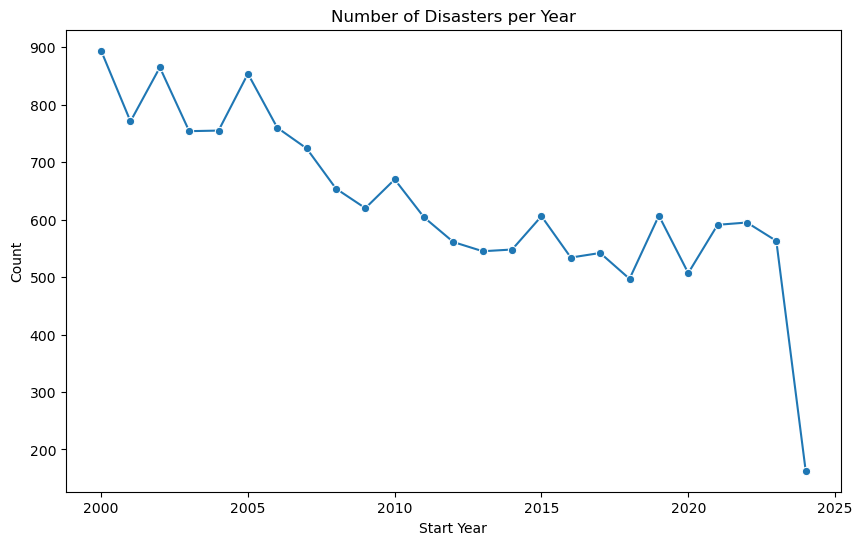

In [127]:
# Count plot for Disaster Types

# Get the number of disasters per year by grouping by "Start Year" and counting how many times each year appears across the dataset
disaster_per_year = df.groupby("Start Year").agg(Count = pd.NamedAgg("Start Year", "count")).sort_values("Start Year").reset_index(drop = False)
disaster_per_year

# Number of disasters per year line plot
plt.figure(figsize = (10, 6))
sns.lineplot(data = disaster_per_year, x = "Start Year", y = "Count", marker = "o")
plt.title('Number of Disasters per Year')
plt.show()


b.	Create a visual that shows the top 10 disasters by total fatalities


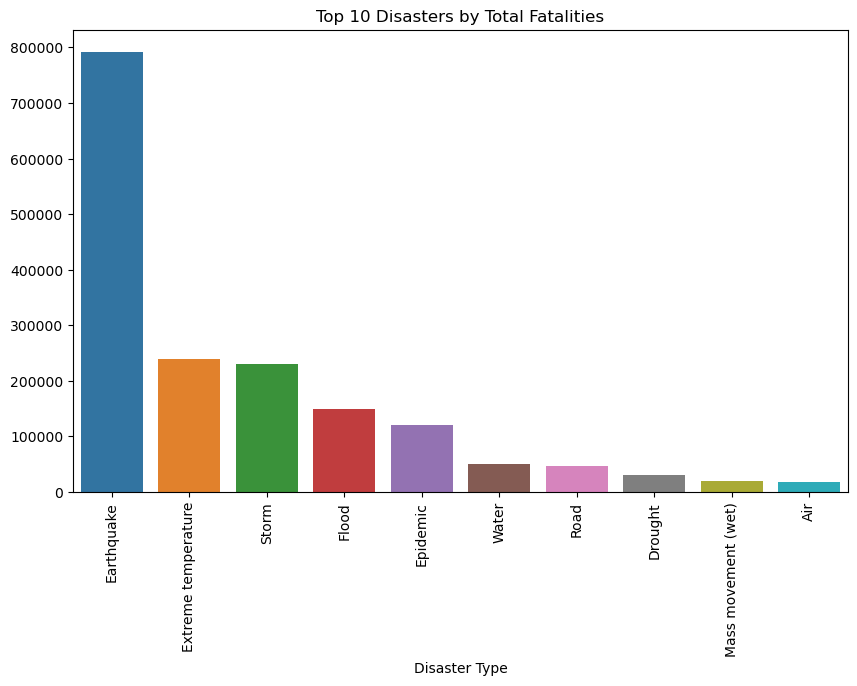

In [128]:
# Visualize the top 10 disasters by fatalities

# Get the number of disasters per year by grouping by "Disaster Type" and "Total Deaths" and usingthe nlargest method to limit to 10
top_disasters = df.groupby('Disaster Type')['Total Deaths'].sum().nlargest(10)
plt.figure(figsize = (10, 6))
sns.barplot(x = top_disasters.index, y = top_disasters.values)
plt.title('Top 10 Disasters by Total Fatalities')
plt.xticks(rotation = 90)
plt.show()

c.	Create a correlation matrix heatmap
    i.	Describe 3 things you notice

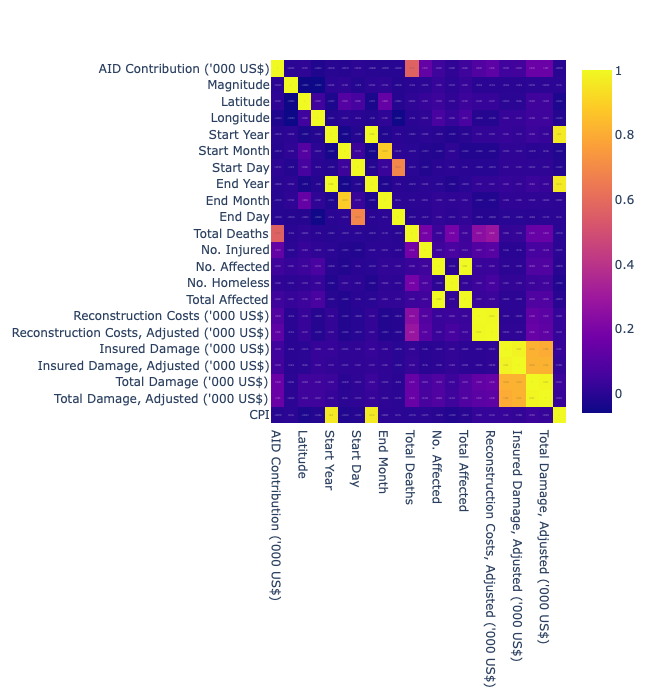

In [129]:
# Correlation matrix for numerical variables

# Only run the .corr() function on numeric values


# Create plot
numerical_df = df.select_dtypes("number")
numerical_df_corr = numerical_df.corr()

# Create heatmap
heatmap = px.imshow(numerical_df_corr, text_auto = True, width = 1500, height = 700, aspect = 5)
heatmap.show()


The Observations I made from analyzing this heat map are:

1. There's seem to be a positively moderate correlation between the varibale 'Total Deaths' and 'AID Contribution'. (0.57)

2. There's a slight correlation between  the variables 'Adjusted Reconstructed cost' and 'Total Deaths'. (0.28)

3. There's a strong positive correlation between  the variables 'Total Damage' and 'Insured Damage'. (0.81)

d.	Create a treemap using hierarchical columns you would like to explore
    i.	What do you notice about the hierarchical order? 

In [130]:
# Import plotly express
import plotly.express as px

#Disaster data from the year 2005
year_filter = df[df["Start Year"] == 2005]
year_filter.shape


(854, 46)

In [131]:
year_filter.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [172]:
Deaths = df.groupby(["Start Year"]).agg(Total_Deaths = pd.NamedAgg("Total Deaths", "size")).sort_values("Start Year").reset_index(drop = False)
Deaths.head(10)

,Start Year,Total_Deaths
0,2000,894
1,2001,771
2,2002,865
3,2003,754
4,2004,755
5,2005,854
6,2006,760
7,2007,724
8,2008,654
9,2009,620


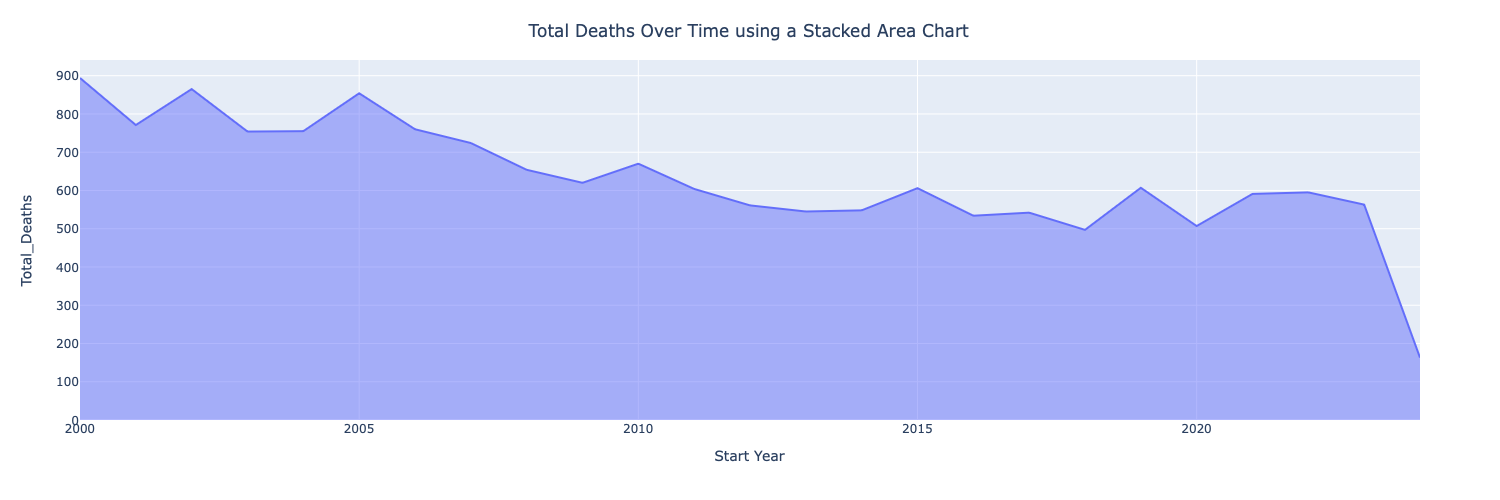

In [180]:
# Create stacked area chart
area_chart = px.area(Deaths, x = "Start Year", y = "Total_Deaths", width = 700, height = 500)
area_chart.update_layout(title = {"text": "Total Deaths Over Time using a Stacked Area Chart", "y": 0.95, "x": 0.5, "xanchor": "center", "yanchor": "top"})
area_chart.show()


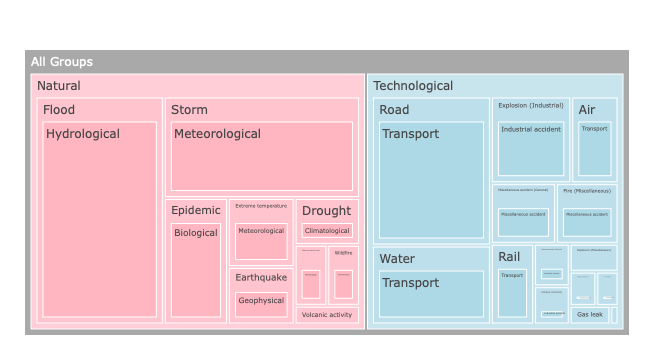

In [133]:
treemap = px.treemap(year_filter_grouped, 
                     path = [px.Constant("All Groups"), "Disaster Group", "Disaster Type", "Disaster Subgroup"],
                     values = "Group_Count")

treemap.update_traces(root_color = "darkgrey")
treemap.update_layout(
    treemapcolorway = ["lightpink", "lightblue"],
    margin = dict(t = 50, l = 25, r = 25, b = 25),
    font_color = "white")
treemap.show()


From the Tree Map above I notice that the size of the natural disaster is greater in size than the Technological. Also it goes from high level to low level and simultaneously goes from left to right in descending order. Floods are resposible for the most disasters in the year 2005 followed by Storms. It could be deduced that the two could be related given that storms typically produce floodings.

e.	Create a stacked area chart of columns of your choosing
    i.	What do you notice? 

In [134]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [135]:
# Let's view how many disasters have a hit a region over time
country_grouped = df.groupby(["Total Deaths", "Start Year"]).agg(Count_Disaster = pd.NamedAgg("Country", "size")).sort_values("Start Year").reset_index(drop = False)
country_grouped

,Total Deaths,Start Year,Count_Disaster
0,34.0,2000,6
1,24.0,2000,10
2,88.0,2000,1
3,130.0,2000,2
4,86.0,2000,1
...,...,...,...
2700,330.0,2024,1
2701,58.0,2024,1
2702,155.0,2024,1
2703,19.0,2024,2


# 3)	Visualizations using PLOTLY library – WEATHER DATASET 



## a.	Create a histogram to show the distribution of temperatures

i.	How is the data distributed?

ii.	What are the majority of temperatures shown? 

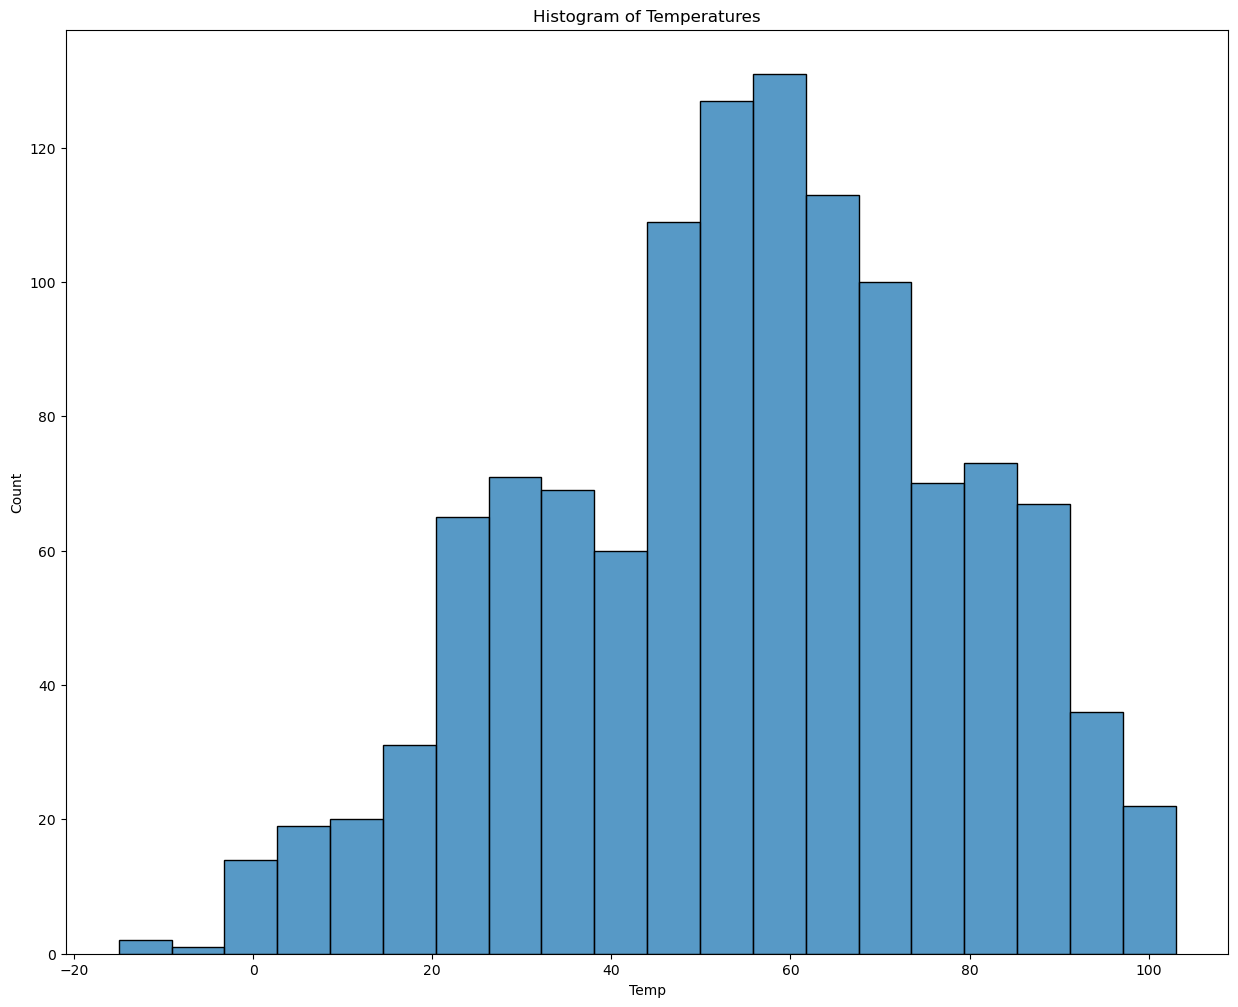

In [136]:
import statistics as stat
# Make the seasons column a category 
df_1["Season"] = df_1["Season"].astype("category")

# Begin creation of histogram
plt.figure(figsize = (15, 12))
sns.histplot(df_1, x = "Temp")
plt.title("Histogram of Temperatures")
plt.show()

The data is skewed to the the left since the median is greater than the mean.

In [138]:
 mean = stat.mean(df_1.Temp)
 
 meadian = stat.median(df_1.Temp)

print(f'The mean is : {mean:.2f} and the meadian is : {meadian}')


The mean is : 54.93 and the meadian is : 56.0


In [139]:
stat.mode(df_1.Temp)

57.0

 The majority of the temperatures shown is 57 degrees based on the mode of the category Temperature.

## b.	Create a boxplot of the data and identify the following values

i.	Max value

ii.	Min value

iii.	Q1, Q3, and the IQR 

iv.	Median 



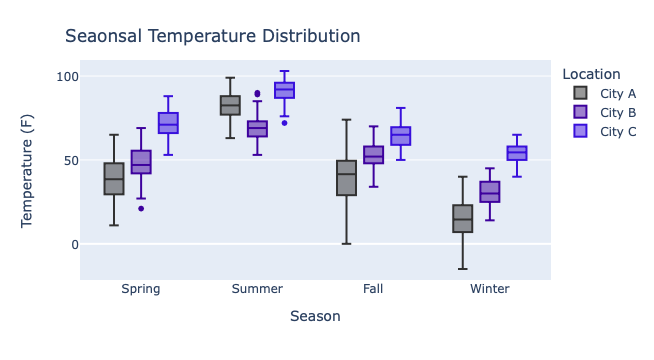

In [140]:
# Create figure and set color theme
boxplot = px.box(df_1, x = "Season", color = "Location", y = "Temp",
                 color_discrete_sequence = px.colors.cyclical.Edge)

# Update titles (main and axes) and format
boxplot.update_layout(title = {"text": "Seaonsal Temperature Distribution",
                               "xanchor": "left", "yanchor": "top", "x": 0.1}, 
                               legend_title_text = "Location", xaxis_title = "Season", yaxis_title = "Temperature (F)")

# Show plot
boxplot.show()

Overall  the maximum temperature recorded was in the summer in for City C

In [141]:
max(df_1.Temp)

103.0

Overall  the minimum temperature recorded was in the winter for City A

In [142]:
min(df_1.Temp)

-15.0


## 4)	Data encoding – DISASTERS DATASET 

a.	Encode 3 different categorical columns in this dataset using scikit-learn techniques, OneHotEncoding and OrdinalEncoding 

b.	Two different data frames should be created because of each technique 


In [143]:
# Scikit-learn Techniques

# Import packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [147]:
# The equivalent of label encoding in scikit-learn is OrdinalEncoder 
# Create an instance of the OrdinalEncoder
# Create a new column, 'Regeion Type Code' by using the fit_transform() function to create numerical values for each Region
# View the original 'Region Type' and 'Region Type Code' to see the new encoded values
ord_encoder = OrdinalEncoder()
df["Region Type Code"] = ord_encoder.fit_transform(df[["Region"]])
df[["Region", "Region Type Code"]].head(15)


,Region,Region Type Code
0,Africa,0.0
1,Africa,0.0
2,Africa,0.0
3,Africa,0.0
4,Africa,0.0
5,Asia,2.0
6,Americas,1.0
7,Asia,2.0
8,Asia,2.0
9,Africa,0.0


In [145]:
# This next example uses OneHotEncoder to encode values
# Create an instance of OneHotEncoder()
# Use fit_transform() to transform categorical values to numerical
onehot_encode_copy = df.copy()
onehot_encoder = OneHotEncoder()
onehot_results = onehot_encoder.fit_transform(onehot_encode_copy[["Subregion"]])

# Put the results into a dataframe for viewing 
onehot_df = pd.DataFrame(onehot_results.toarray(), columns = onehot_encode_copy["Subregion"].unique())


In [146]:
# Join dataframe back to original dataframe
onehot_encode_copy = onehot_encode_copy.join(onehot_df)
df.head(10)


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Region Type Code
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,702336.0,250000.0,349124.5,100000.0,140878.0,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25,0.0
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,702336.0,250000.0,349124.5,100000.0,140878.0,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25,0.0
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,702336.0,250000.0,349124.5,100000.0,140878.0,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25,0.0
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,702336.0,250000.0,349124.5,100000.0,140878.0,56.514291,NaN,2004-10-27,2023-09-25,0.0
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,702336.0,250000.0,349124.5,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25,0.0
5,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,702336.0,250000.0,349124.5,100000.0,140878.0,56.514291,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25,2.0
6,2000-0004-BRA,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,BRA,...,702336.0,250000.0,349124.5,100000.0,140878.0,56.514291,NaN,2003-07-01,2023-09-25,1.0
7,2000-0005-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,...,702336.0,250000.0,349124.5,100000.0,140878.0,56.514291,NaN,2005-02-09,2023-09-25,2.0
8,2000-0006-CHN,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Hotel,CHN,...,702336.0,250000.0,349124.5,100000.0,140878.0,56.514291,NaN,2003-07-01,2023-09-25,2.0
9,2000-0007-EGY,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,EGY,...,702336.0,250000.0,349124.5,100000.0,140878.0,56.514291,NaN,2003-07-01,2023-09-25,0.0


In [151]:
#Encoding Appeal Category using Ordinal Encoder

ord_encoder = OrdinalEncoder()
df["Appeal Type Code"] = ord_encoder.fit_transform(df[["Appeal"]])
df[["Appeal", "Appeal Type Code"]].head(10)

,Appeal,Appeal Type Code
0,No,0.0
1,No,0.0
2,No,0.0
3,No,0.0
4,No,0.0
5,No,0.0
6,No,0.0
7,No,0.0
8,No,0.0
9,No,0.0
